<a href="https://colab.research.google.com/github/hamdansethi/NLP/blob/main/07__Your_First_Sentiment_Analyzer_using_Sentiment_Lexicons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

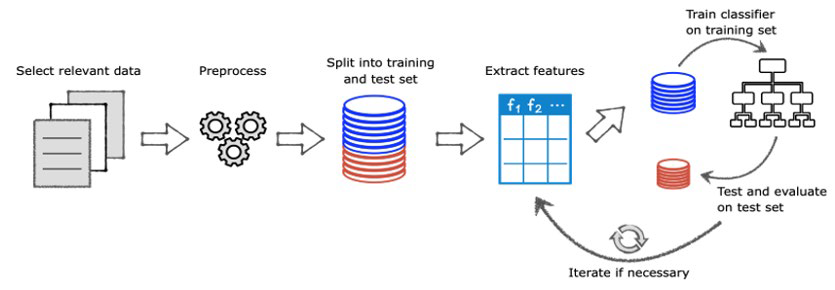

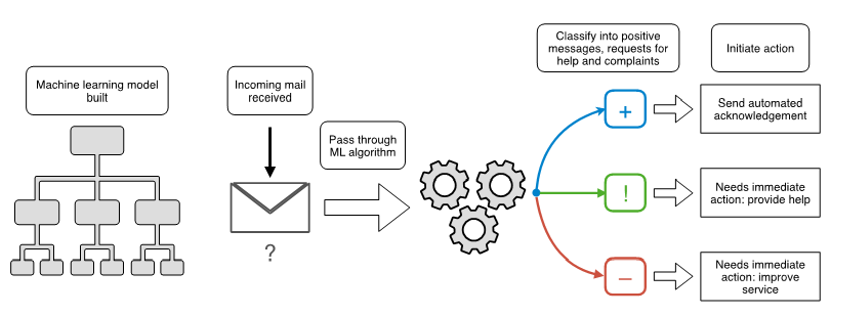

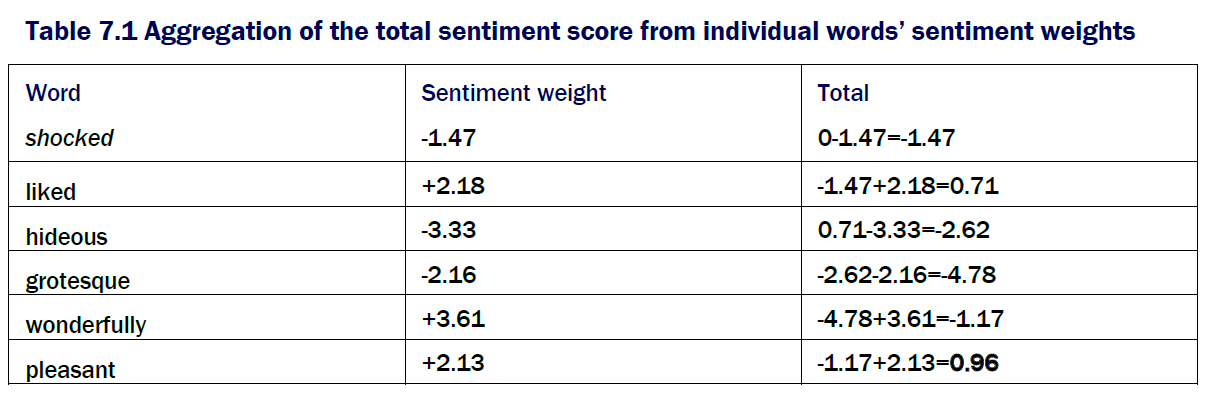

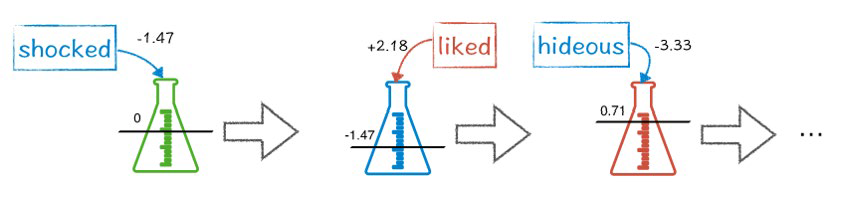

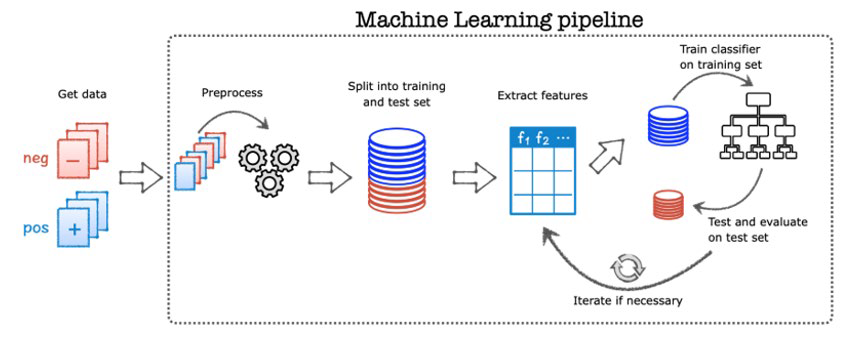

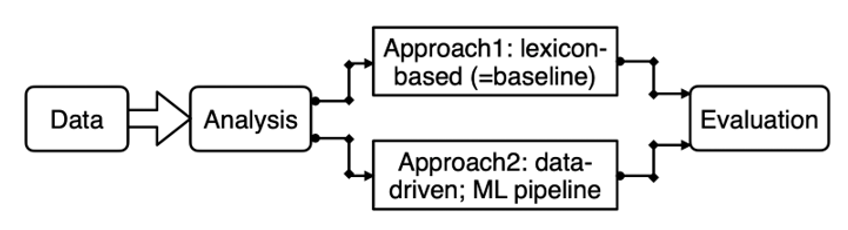

[DataSet](http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz)

In [ ]:
import tarfile

file_name = "review_polarity.tar.gz"

with tarfile.open(file_name, "r:gz") as tar:
    tar.extractall("extracted_data")
    print("Extraction complete!")

Extraction complete!


In [ ]:
import os, codecs

def read_in(folder):

  files = os.listdir(folder) #A
  a_dict = {}

  for a_file in sorted(files):
    if not a_file.startswith("."):
      with codecs.open(folder + a_file, encoding='ISO-8859-1', errors ='ignore') as f: #B
        file_id = a_file.split(".")[0].strip() #C
        a_dict[file_id] = f.read()
      f.close()
  return a_dict #D

#A List all the files in a given folder using Python’s os functionality
#B Unless a file name starts with “.”, read the contents of the file
#C Extract the unique_id bit and use it as the unique identifier for the contents of the review
#D Return a Python dictionary a_dict, where the review’s unique identifier is mapped to the review’s content

In [ ]:
folder = "/content/extracted_data/txt_sentoken/" #A

pos_dict = read_in(folder + "pos/")
print(len(pos_dict))
print(pos_dict.get(next(iter(pos_dict)))) #B

neg_dict = read_in(folder + "neg/")
print(len(neg_dict))
print(neg_dict.get(next(iter(neg_dict)))) #C

#A All the reviews are stored in review_polarity/txt_sentoken/
#B Print out the length of the pos_dict and the very first positive review
#C Similarly, print out the length of the neg_dict and the very first review in it

1000
films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before . 
for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen . 
to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . 
the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . 
in other words , don't dismiss this film because of its source . 
if you can get past the whole comic book thing , you might find another stumbling block in from hell's directors , albert and allen hughes . 
getting the hughes brothers to direct this seems almos

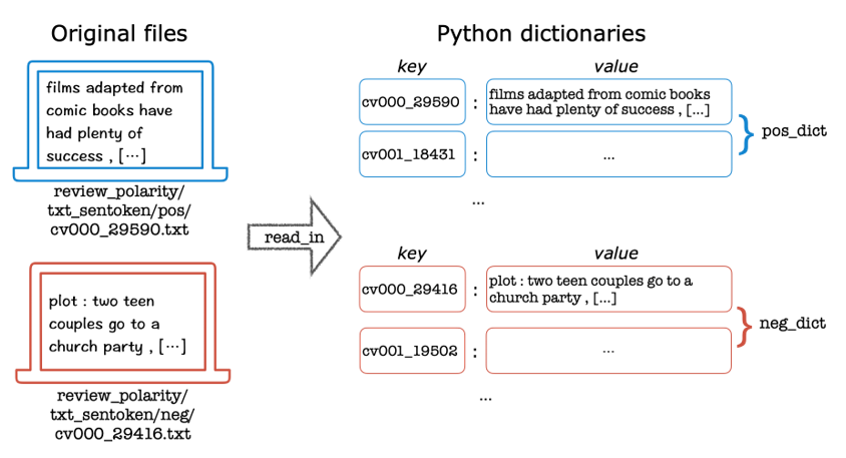

In [ ]:
def tokenize(text):
  text.replace("\n", " ")
  return text.split() #A

def statistics(a_dict):
  length = 0
  sent_length = 0
  num_sents = 0
  vocab = [] #B

  for review in a_dict.values():
    length += len(tokenize(review))
    sents = review.split("\n")
    num_sents += len(sents)
    for sent in sents:
      sent_length += len(tokenize(sent))
    vocab += tokenize(review)

  avg_length = float(length)/len(a_dict)
  avg_sent_length = float(sent_length)/num_sents
  vocab_size = len(set(vocab))
  diversity = float(length)/float(vocab_size)

  return avg_length, avg_sent_length, vocab_size, diversity #C

categories = ["Positive", "Negative"]
rows = []
rows.append(["Category", "Avg_Len(Review)", "Avg_Len(Sent)", "Vocabulary Size", "Diversity"])

stats = {}
stats["Positive"] = statistics(pos_dict)
stats["Negative"] = statistics(neg_dict)

for cat in categories:
  rows.append([cat, f"{stats.get(cat)[0]:.6f}",
                    f"{stats.get(cat)[1]:.6f}",
                    f"{stats.get(cat)[2]:.6f}",
                    f"{stats.get(cat)[3]:.6f}"])

columns = zip(*rows)
column_widths = [max(len(item) for item in col) for col in columns]

for row in rows:
  print(''.join(' {:{width}} '.format(row[i], width=column_widths[i]) for i in range(0, len(row)))) #D

#A To tokenize texts, simply split them by whitespaces
#B Initialize length, sent_length, num_sents, and vocab variables
#C Calculate avg_length and avg_sent_length and estimate vocabulary size and diversity
#D Use the printing routine from before and print out the statistics for the positive and negative reviews

 Category  Avg_Len(Review)  Avg_Len(Sent)  Vocabulary Size  Diversity 
 Positive  787.051000       23.191531      36805.000000     21.384350 
 Negative  705.630000       21.524266      34542.000000     20.428174 


In [ ]:
def vocab_difference(list1, list2):
    vocab1 = []
    vocab2 = []
    for rev in list1:
        vocab1 += tokenize(rev)
    for rev in list2:
        vocab2 += tokenize(rev) #A

    return sorted(list(set(vocab1) - set(vocab2)))

pos_wordlist = pos_dict.values()
neg_wordlist = neg_dict.values() #B

print(vocab_difference(pos_wordlist, neg_wordlist)[1500:1600])
print(vocab_difference(neg_wordlist, pos_wordlist)[1500:1600]) #C
print()
print(str(len(vocab_difference(pos_wordlist, neg_wordlist))) + " unique words in positive reviews only")
print(str(len(vocab_difference(neg_wordlist, pos_wordlist))) + " unique words in negative reviews only") #D

#A Collect vocabularies from reviews and return the list of words that are in one vocabulary but not in another
#B Contents of the reviews can be extracted from sentiment dictionaries by accessing values()
#C Print out full lists of non-overlapping words or some selected parts
#D Finally, print out the length of each list of non-overlapping words

['asssss', 'assuaged', 'asthmatic', 'astin', 'astonishment', 'astor', "astronauts'", 'astronomer/writer', 'astronomical', 'astronomically', 'asuma', 'at-odds', 'atf', 'atheism', 'atheists', 'atkine', "atlanta's", "atlantic's", 'atlantis', "atlantis'", 'atmospheres', 'atmospherically', 'atmostpheric', 'atomizers', 'atone', 'atreus', 'atrophied', 'atrophy', 'attachs', 'attainable', "attanasio's", "attendant's", 'attendees', 'attention-grabbing', 'attentive', 'attentiveness', 'attest', 'attilla-looking', 'attractions', 'attractive-seeming', 'attractiveness', 'au/~koukoula/', 'auberjonois', 'audacious', 'audacious--and', 'audience--in', 'audience-friendly', 'audience-pleaser', 'audience-pleasing', 'audiotapes', 'auditioned', 'auditor', 'audre', 'aug', 'aughra', 'augment', "august's", 'augusts', 'aulon', 'aumont', 'aunjanue', 'auntie', 'aural', 'aurally', 'aurelien', 'aurelius', "aurelius'", 'auriga', 'auriol', 'aurora', 'auschwitz', 'austen-like', "australian's", 'australian/belgian', 'aut

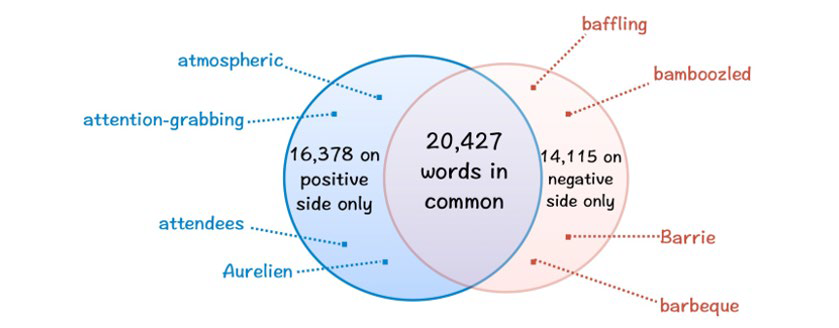

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm") #A

def spacy_preprocess_reviews(source):
    source_docs = {} #B

    index = 0
    for review_id in source.keys():
        source_docs[review_id] = nlp(
            source.get(review_id).replace("\n", ""),
            disable=["ner"]) #C
        if index>0 and (index%200)==0:
            print(str(index) + " reviews processed") #D
        index += 1
    print("Dataset processed")
    return source_docs

pos_docs = spacy_preprocess_reviews(pos_dict)
neg_docs = spacy_preprocess_reviews(neg_dict) #E

#A Import spacy and initialize the pipeline with the particular set of tools
#B The “container” source_docs maps each review’s unique identifier to its linguistic information
#C To facilitate processing, merge all sentences in the review in one line of text and disable “ner”
#D Print out some tracking messages after a batch of each 200 reviews is processed
#E Return the linguistic containers for the two types of reviews

200 reviews processed
400 reviews processed
600 reviews processed
800 reviews processed
Dataset processed
200 reviews processed
400 reviews processed
600 reviews processed
800 reviews processed
Dataset processed


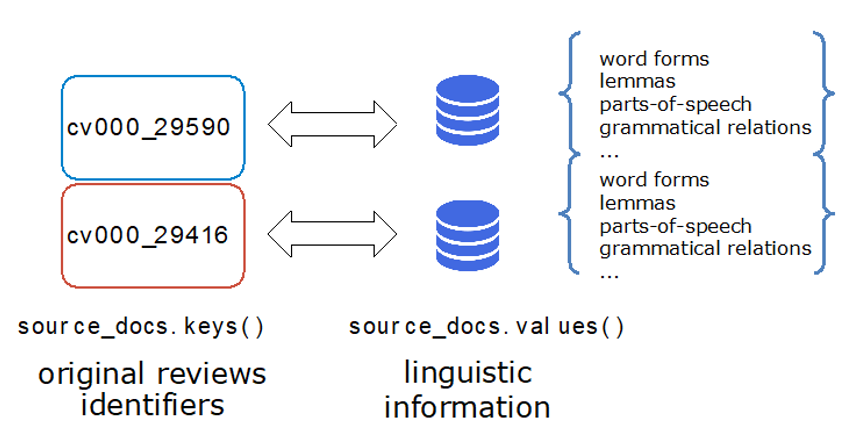

In [ ]:
list(pos_docs.values())[2]

you've got mail works alot better than it deserves to . in order to make the film a success , all they had to do was cast two extremely popular and attractive stars , have them share the screen for about two hours and then collect the profits . no real acting was involved and there is not an original or inventive bone in it's body ( it's basically a complete re-shoot of the shop around the corner , only adding a few modern twists ) . essentially , it goes against and defies all concepts of good contemporary filmmaking . it's overly sentimental and at times terribly mushy , not to mention very manipulative . but oh , how enjoyable that manipulation is . but there must be something other than the casting and manipulation that makes the movie work as well as it does , because i absolutely hated the previous ryan/hanks teaming , sleepless in seattle . it couldn't have been the directing , because both films were helmed by the same woman . i haven't quite yet figured out what i liked so muc

In [ ]:
def statistics_lem(source_docs): #A
    length = 0
    vocab = []
    for review_id in source_docs.keys():
        review_doc = source_docs.get(review_id)
        lemmas = []
        for token in review_doc:
            lemmas.append(token.lemma_) #B
        length += len(lemmas)
        vocab += lemmas
    avg_length = float(length)/len(source_docs)
    vocab_size = len(set(vocab))
    diversity = float(length)/float(vocab_size)
    return avg_length, vocab_size, diversity

categories = ["Positive", "Negative"]
rows = []
rows.append(["Category", "Avg_Len(Review)", "Vocabulary Size", "Diversity"])
stats = {}
stats["Positive"] = statistics_lem(pos_docs)
stats["Negative"] = statistics_lem(neg_docs)
for cat in categories:
    rows.append([cat, f"{stats.get(cat)[0]:.6f}",
                f"{stats.get(cat)[1]:.6f}",
                f"{stats.get(cat)[2]:.6f}"])

columns = zip(*rows)
column_widths = [max(len(item) for item in col) for col in columns]
for row in rows:
    print(''.join(' {:{width}} '.format(row[i], width=column_widths[i]) for i in range(0, len(row)))) #C


#A Input linguistic containers, source_docs, instead of original review dictionaries
#B Lemmas can be accessed using lemma_ field
#C The rest of the code is very similar to what you did in Listing 7.3

 Category  Avg_Len(Review)  Vocabulary Size  Diversity 
 Positive  818.959000       24427.000000     33.526794 
 Negative  737.666000       22819.000000     32.326833 


In [ ]:
def vocab_lem_difference(source_docs1, source_docs2):
    vocab1 = []
    vocab2 = []
    for rev_id in source_docs1.keys():
        rev = source_docs1.get(rev_id)
        for token in rev:
            vocab1.append(token.lemma_) #A

    for rev_id in source_docs2.keys():
        rev = source_docs2.get(rev_id)
        for token in rev:
            vocab2.append(token.lemma_)
    return sorted(list(set(vocab1) - set(vocab2)))

print(str(len(vocab_lem_difference(pos_docs, neg_docs))) + " unique lemmas in positive reviews only")
print(str(len(vocab_lem_difference(neg_docs, pos_docs))) + " unique lemmas in negative reviews only")


#A Most of this code is similar to the code from Listing 7.4. The difference is that you need to use lemma_

9234 unique lemmas in positive reviews only
7626 unique lemmas in negative reviews only


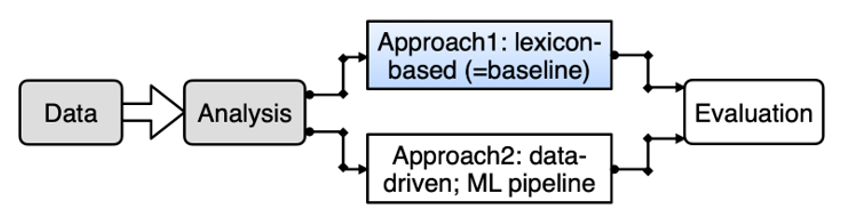

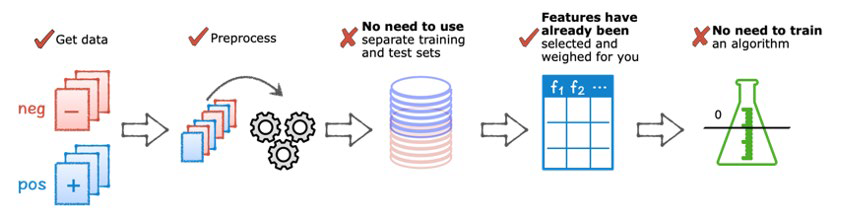

[Social Sent](https://nlp.stanford.edu/projects/socialsent/)

In [ ]:
import zipfile
import os

zip_file_path = "/content/socialsent_hist_freq.zip"
destination_folder = "/content/"

os.makedirs(destination_folder, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

print(f"Files extracted to {destination_folder}")

Files extracted to /content/


In [ ]:
def collect_wordlist(input_file):
    word_dict = {}
    with codecs.open(input_file, encoding='ISO-8859-1', errors ='ignore') as f:
        for a_line in f.readlines():
            cols = a_line.split("\t") #A
            if len(cols)>2:
                word = cols[0].strip()
                score = float(cols[1].strip())
                word_dict[word] = score #B
    f.close()
    return word_dict

adj_90 = collect_wordlist("adjectives/1990.tsv")
print(adj_90.get("cool"))
print(len(adj_90)) #C
adj_00 = collect_wordlist("adjectives/2000.tsv")
print(adj_00.get("cool"))
print(len(adj_00))
all_90 = collect_wordlist("frequent_words/1990.tsv")
print(len(all_90))
all_00 = collect_wordlist("frequent_words/2000.tsv")
print(len(all_00))
movie_words = collect_wordlist("subreddits/movies.tsv")
print(len(movie_words)) #D


#A Read the tab-separated file line by line and split each line by tabs
#B The first element corresponds to a word and the second to its mean sentiment score
#C Read in the data from the sentiment lexicons of your choice and run some checks
#D Feel free to explore your own selection of words or even use different lexicons from the original source!

1.28
1968
1.19
2041
4924
4924
4981


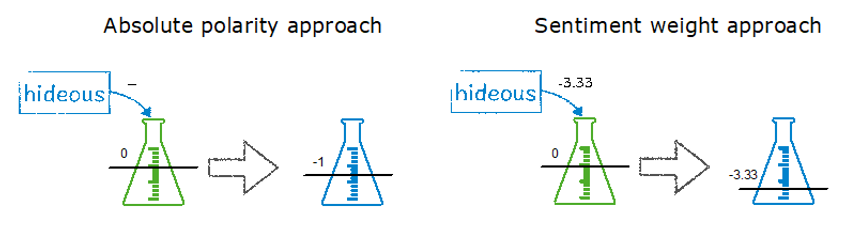

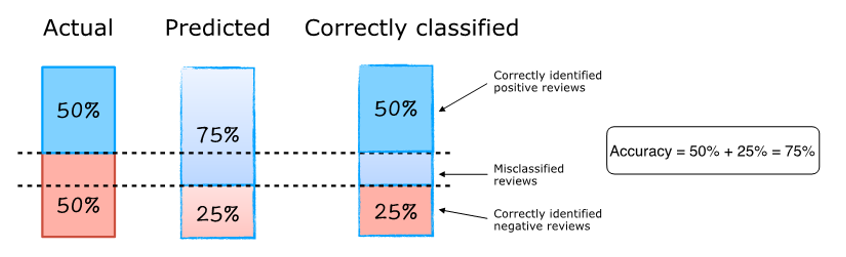

In [ ]:
def bin_decisions(a_dict, label, sent_dict):
    decisions = []
    for rev_id in a_dict.keys():
        score = 0
        for token in a_dict.get(rev_id):
            if token.text in sent_dict.keys():
                if sent_dict.get(token.text)<0:
                    score -= 1
                else:
                    score += 1 #A
        if score < 0:
            decisions.append((-1, label))
        else:
            decisions.append((1, label)) #B
    return decisions

def weighted_decisions(a_dict, label, sent_dict):
    decisions = []
    for rev_id in a_dict.keys():
        score = 0
        for token in a_dict.get(rev_id):
            if token.text in sent_dict.keys():
                score += sent_dict.get(token.text) #C
        if score < 0:
            decisions.append((-1, label))
        else:
            decisions.append((1, label)) #D
    return decisions

def get_accuracy(pos_docs, neg_docs, sent_dict):
    decisions_pos = weighted_decisions(pos_docs, 1, sent_dict)
    decisions_neg = weighted_decisions(
        neg_docs, -1, sent_dict) #E
    decisions_all = decisions_pos + decisions_neg
    lists = [decisions_pos, decisions_neg, decisions_all]
    accuracies = []
    for i in range(0, len(lists)):
        match = 0
        for item in lists[i]:
            if item[0]==item[1]:
                match += 1
        accuracies.append(
            float(match)/float(len(lists[i]))) #F
    return accuracies

categories = ["Adj_90", "Adj_00", "All_90", "All_00", "Movies"]
rows = []
rows.append(["List", "Acc(positive)", "Acc(negative)", "Acc(all)"])
accs = {}
accs["Adj_90"] = get_accuracy(pos_docs, neg_docs, adj_90)
accs["Adj_00"] = get_accuracy(pos_docs, neg_docs, adj_00)
accs["All_90"] = get_accuracy(pos_docs, neg_docs, all_90)
accs["All_00"] = get_accuracy(pos_docs, neg_docs, all_00)
accs["Movies"] = get_accuracy(
    pos_docs, neg_docs, movie_words) #G
for cat in categories:
    rows.append([cat, f"{accs.get(cat)[0]:.6f}",
                f"{accs.get(cat)[1]:.6f}",
                f"{accs.get(cat)[2]:.6f}"])

columns = zip(*rows)
column_widths = [max(len(item) for item in col) for col in columns]
for row in rows:
    print(''.join(' {:{width}} '.format(row[i], width=column_widths[i])
                  for i in range(0, len(row)))) #H


#A With the bin_decisions function, for each review you aggregate the score in the binary way
#B Convert all aggregated scores and store them in the decisions list
#C With weighted_decisions function, each word from the lexicon contributes a sentiment score
#D Populate the decisions list with tuples of the predicted scores and the actual sentiment labels
#E Calculate accuracy for both bin_decisions and weighted_decisions function
#F Calculate the proportion of reviews with the correctly identified sentiment
#G Estimate accuracies for each of the word lexicons of interest
#H Use printing routine to print out the results in one nice table

 List    Acc(positive)  Acc(negative)  Acc(all) 
 Adj_90  0.788000       0.507000       0.647500 
 Adj_00  0.818000       0.424000       0.621000 
 All_90  0.984000       0.018000       0.501000 
 All_00  0.805000       0.372000       0.588500 
 Movies  0.008000       0.997000       0.502500 
